[Money Creation Examples](http://www.siebenbrunner.com/moneycreation/) > **Agent-based Example**:
# Lending in an agent-based framework
This notebook demonstrates how to implement booking statements in an agent-based framework using the [abcEconomics](https://github.com/AB-CE/abce) library. The booking statements shown here are a slightly extended version of those in [Example 2](http://www.siebenbrunner.com/moneycreation/Ex2_Lending.html), i.e. demonstrating the effects of lending, interest and dividend payments on money stocks.

We start by importing required utilities:

In [1]:
import abcEconomics

import os
import sys

base_path = os.path.realpath(os.getcwd()+"/../..")
sys.path.append(base_path)

from abcFinance import Accountant

In [2]:
from IPython.core.display import SVG
from IPython.display import display_svg

def print_money_stocks():
    bank_money = bank.get_balance('Deposits')[0][0][1]
        
    print("Total (Bank) Money:",bank_money)

def print_balance_sheets_and_money_stocks(*args):
    bank.book_end_of_period()
    household.book_end_of_period()
    bank_owner.book_end_of_period()
    display_svg(SVG(bank.draw_balance_sheet("Bank Balance Sheet")[0][0]))
    display_svg(SVG(household.draw_balance_sheet("Household Balance Sheet")[0][0]))
    if "include_owner" in args: display_svg(SVG(bank_owner.draw_balance_sheet("Bank Owner Balance Sheet")[0][0]))
    
    print_money_stocks()

## Define agent classes
We now create a class for each type of agent. Notice that the overhead compared to the [agent declaration in Example 2](http://www.siebenbrunner.com/moneycreation/Ex2_Lending.html#Declaration-of-agents) is very limited.

In [3]:
class Bank(Accountant):
    def init(self, reserves=0, loans=0, deposits=0):
        self.make_asset_accounts(['Reserves', 'Loans'])
        self.make_liability_accounts(['Deposits'])
        self.make_flow_accounts(['Interest income'])
        self.book(debit=[('Reserves', reserves), ('Loans', loans)], 
                  credit=[('Deposits', deposits), ('Equity', reserves + loans - deposits)], 
                  text='Capital endowment')
        self.book_end_of_period()
        
class Household(Accountant):
    def init(self, money=0, loans=0, participations=0):
        self.make_asset_accounts(['Money','Participations'])
        self.make_liability_accounts(['Loans'])
        self.make_flow_accounts(['Dividend income','Interest expenses'])
        self.book(debit=[('Money', money),('Participations', participations)], 
                  credit=[('Loans', loans), ('Equity', money + participations - loans)], 
                  text='Initial endowment')
        self.book_end_of_period()

## Initialize the system with outside money endowments

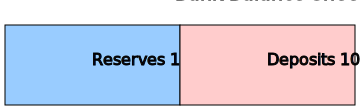

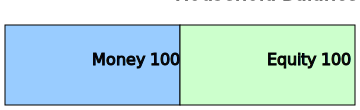

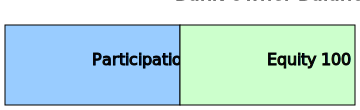

Total (Bank) Money: 100


In [4]:
sim = abcEconomics.Simulation()
bank = sim.build_agents(Bank, 'bank', number=1, reserves=100,deposits=100)
household = sim.build_agents(Household, 'household', number=1, money=100, loans=0)
bank_owner = sim.build_agents(Household, 'bank_owner', number=1, participations=100)
print_balance_sheets_and_money_stocks("include_owner")

## Granting of a loan

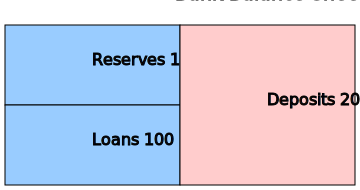

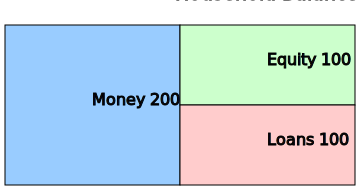

Total (Bank) Money: 200


In [5]:
bank.book(debit=[('Loans', 100)], credit=[('Deposits', 100)], text='Loan granting')
household.book(debit=[('Money', 100)], credit=[('Loans', 100)], text='Take out loan')
print_balance_sheets_and_money_stocks()

## Interest payment

Bank
Flow accounts:
   Interest income : 25
Profit for period:  25
--
Household
Flow accounts:
   Interest expenses : -25
Profit for period:  -25
--


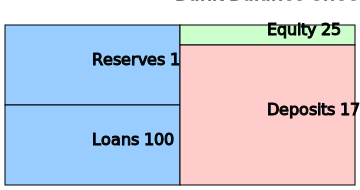

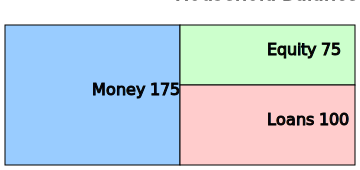

Total (Bank) Money: 175


In [6]:
household.book(debit=[('Interest expenses', 25)], credit=[('Money', 25)], text='Interest payment')
bank.book(debit=[('Deposits', 25)], credit=[('Interest income', 25)], text='Interest payment')
print('Bank')
bank.print_profit_and_loss()
print('Household')
household.print_profit_and_loss()
print_balance_sheets_and_money_stocks()

## Dividend payment

Bank
Flow accounts:
Profit for period:  0
Profit distribution and capital actions
   Dividend payment : -25
--
Bank Owner
Flow accounts:
   Dividend income : 25
Profit for period:  25
--


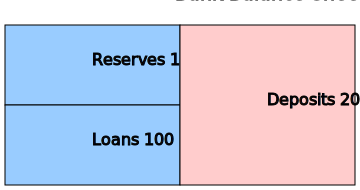

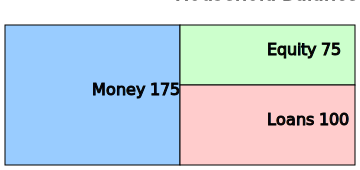

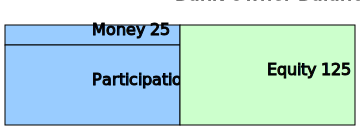

Total (Bank) Money: 200


In [7]:
bank.book(debit=[('Equity', 25)], credit=[('Deposits', 25)], text='Dividend payment')
bank_owner.book(debit=[('Money', 25)], credit=[('Dividend income', 25)], text='Dividend payment')
print('Bank')
bank.print_profit_and_loss()
print('Bank Owner')
bank_owner.print_profit_and_loss()
print_balance_sheets_and_money_stocks("include_owner")

## Loan principal repayment

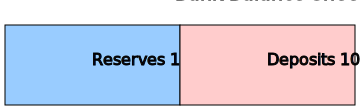

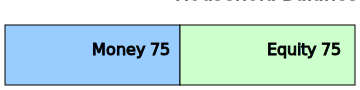

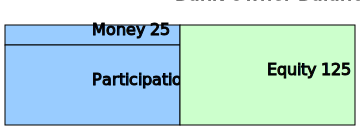

Total (Bank) Money: 100


In [8]:
household.book(debit=[('Loans', 100)], credit=[('Money', 100)], text='Principal repayment')
bank.book(debit=[('Deposits', 100)], credit=[('Loans', 100)], text='Principal repayment')
print_balance_sheets_and_money_stocks("include_owner")